In [1]:
from fastai.basics import *
from fastai.medical.imaging import *

In [2]:
class CreateDicomDf():
    
    def __init__(self, path: str):
        self.path = Path(path)
        self.items = get_dicom_files(self.path)
        
    def get_sample_names(self, n=5):
        return self.items[:n].attrgot("name")
    
    def show_example(self):
        idx = np.random.randint(0, len(self.items))
        sample = self.items[idx].dcmread()
        return sample, sample.show()
    
    def create_dicom_df(self, name: str, px_summ=False):
        df = pd.DataFrame.from_dicoms(self.items, px_summ=px_summ)
        df.to_csv(f"{name}.csv")
        return df.head()
    
    def __len__(self):
        return len(self.items)

In [3]:
path = "/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM"
roimask_cropped_imgs = CreateDicomDf(path)

In [4]:
print(f"Number of images: {len(roimask_cropped_imgs)}")
roimask_cropped_imgs.get_sample_names()

Number of images: 3092


(#5) ['1-2.dcm','1-1.dcm','1-2.dcm','1-1.dcm','1-2.dcm']

(Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 194
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.350195951511477488426789574562785911851
 (0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
 -------------------------------------------------
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.350195951511477488426789574562785911851
 (0008, 0020) Study Date                          DA: '20170830'
 (0008, 0

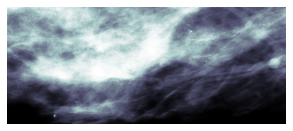

In [5]:
roimask_cropped_imgs.show_example()

In [6]:
roimask_cropped_imgs.create_dicom_df("roimask_cropped_df", px_summ=True)

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,ContentDate,StudyTime,ContentTime,AccessionNumber,Modality,ConversionType,...,HighBit,PixelRepresentation,SmallestImagePixelValue,LargestImagePixelValue,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.15100434013356500520766145571364130127,20170906,20160503,085625,125420.992000,,MG,WSD,...,7,0,0,255,/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM/Calc-Training_P_01293_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.39619664512659730412187431883711260700/1.3.6.1.4.1.9590.100.1.2.313742823411562430408347460331482749149/1-2.dcm,0,255,0.248555,7.957366,0.0
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.146599831611594799021007072404090856203,20170830,20160503,215348,125420.992000,,MG,WSD,...,15,0,44515,65535,/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM/Calc-Training_P_01293_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.39619664512659730412187431883711260700/1.3.6.1.4.1.9590.100.1.2.313742823411562430408347460331482749149/1-1.dcm,-21021,-1,50020.646499,2423.293412,0.0
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.312066707711170579427731728691190732726,20170906,20160503,090203,131310.917000,,MG,WSD,...,7,0,0,255,/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM/Calc-Training_P_01488_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.161424774413171755140562331431005189318/1.3.6.1.4.1.9590.100.1.2.76823745911997404013305900901222656538/1-2.dcm,0,255,8.988889,47.025169,0.0
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.305646080010233899031741718142753288053,20170830,20160503,215429,131310.917000,,MG,WSD,...,15,0,8782,65535,/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM/Calc-Training_P_01488_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.161424774413171755140562331431005189318/1.3.6.1.4.1.9590.100.1.2.76823745911997404013305900901222656538/1-1.dcm,8782,-1,41425.227387,9606.588572,0.0
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.148298301712019279521569120501290776809,20170906,20160503,082411,110107.187000,,MG,WSD,...,7,0,0,255,/kaggle/input/calctraining-roimask-and-crpped-images/CBIS-DDSM/Calc-Training_P_00047_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.423605148511005351534018620271909026174/1.3.6.1.4.1.9590.100.1.2.209011943713455167027412576173668727159/1-2.dcm,0,255,0.161141,6.408194,0.0


In [7]:
path = "/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM"
full_mammo_imgs = CreateDicomDf(path)

In [8]:
print(f"Number of images: {len(full_mammo_imgs)}")
full_mammo_imgs.get_sample_names()

Number of images: 1227


(#5) ['1-1.dcm','1-1.dcm','1-1.dcm','1-1.dcm','1-1.dcm']

(Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 194
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.280759999712776333832506740772048367994
 (0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
 -------------------------------------------------
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.280759999712776333832506740772048367994
 (0008, 0020) Study Date                          DA: '20160807'
 (0008, 0

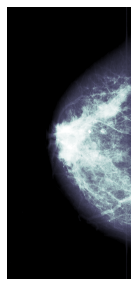

In [9]:
full_mammo_imgs.show_example()

In [10]:
full_mammo_imgs.create_dicom_df("full_mammo_imgs", px_summ=True)

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,ContentDate,StudyTime,ContentTime,AccessionNumber,Modality,ConversionType,...,HighBit,PixelRepresentation,SmallestImagePixelValue,LargestImagePixelValue,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.15688760811143975434734811273146566088,20160807,20160503,163113,115030.838000,,MG,WSD,...,15,0,0,65535,/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM/Calc-Training_P_00538_RIGHT_MLO/08-07-2016-DDSM-NA-26887/1.000000-full mammogram images-81412/1-1.dcm,0,-1,8686.665703,14436.772147,0.002313
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.252402654112412533004879576800166651042,20160807,20160503,164024,121042.630000,,MG,WSD,...,15,0,0,65535,/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM/Calc-Training_P_00780_LEFT_CC/08-07-2016-DDSM-NA-28496/1.000000-full mammogram images-02779/1-1.dcm,0,-1,13528.340982,15362.172323,0.001216
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.67964921810086504337162892134055597163,20160807,20160503,164543,122238.527000,,MG,WSD,...,15,0,0,65535,/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM/Calc-Training_P_00925_RIGHT_CC/08-07-2016-DDSM-NA-49328/1.000000-full mammogram images-56604/1-1.dcm,0,-1,9913.856608,13107.277028,0.000694
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.397097213010483689921516138343509352804,20160807,20160503,161809,111949.483000,,MG,WSD,...,15,0,0,65535,/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM/Calc-Training_P_00224_LEFT_CC/08-07-2016-DDSM-NA-32339/1.000000-full mammogram images-36735/1-1.dcm,0,-1,9331.162974,13453.602596,0.000890
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.387043462511573825104858177461031698378,20160807,20160503,164800,122635.844000,,MG,WSD,...,15,0,0,65535,/kaggle/input/calctraining-full-mammogram-images/CBIS-DDSM/Calc-Training_P_00978_LEFT_CC/08-07-2016-DDSM-NA-54589/1.000000-full mammogram images-59992/1-1.dcm,0,-1,10208.331760,16699.651013,0.000628
